In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
imagen = plt.imread('Fotos/SM_134/1.tif')

imagen.shape

(336, 514, 3)

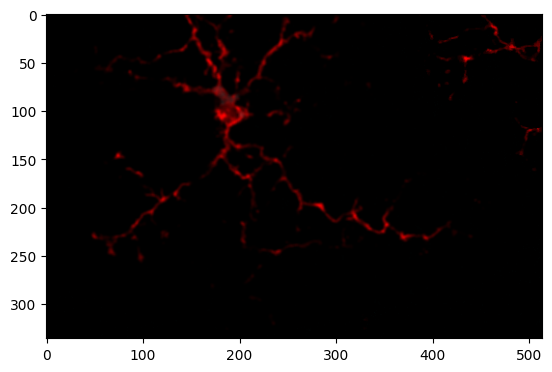

In [3]:
plt.imshow(imagen)

Ahora vamos a querer generar dos arrays nuevos usando el canal verde. Uno que tenga la información del canal verde donde el rojo sea positivo (canal_verde_sobre_rojo) y otro que tenga la información del canal verde donde el canal rojo sea negativo (canal_verde_anti_rojo)

In [4]:
#Creamos dos arrays nuevos, uno con el canal rojo y otro con el verde.
canal_rojo = imagen[:,:,0] #Canal rojo
canal_verde = imagen[:,:,1] #Canal verde

In [5]:
#Creo dos copias del canal verde para modificarlo
canal_verde_sobre_rojo = canal_verde.copy()
canal_verde_anti_rojo = canal_verde.copy()

#Usando la info del canal rojo, modifico el verde
canal_verde_sobre_rojo[canal_rojo == 0] = 0
canal_verde_anti_rojo[canal_rojo != 0] = 0

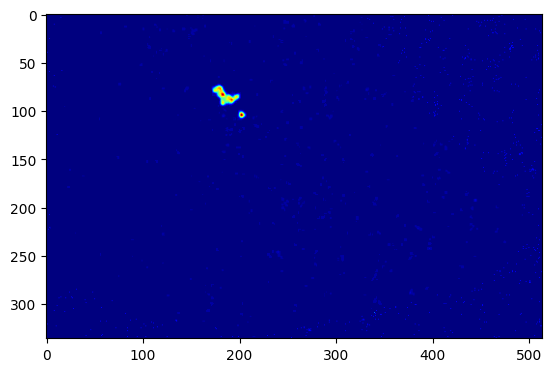

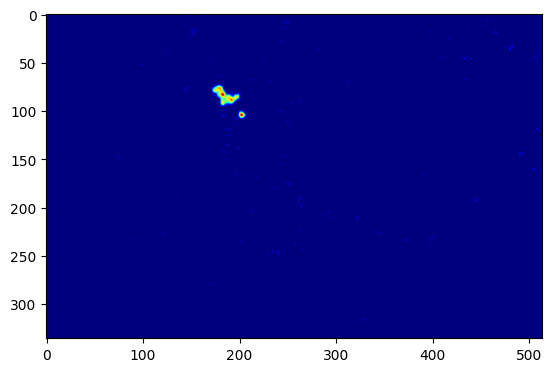

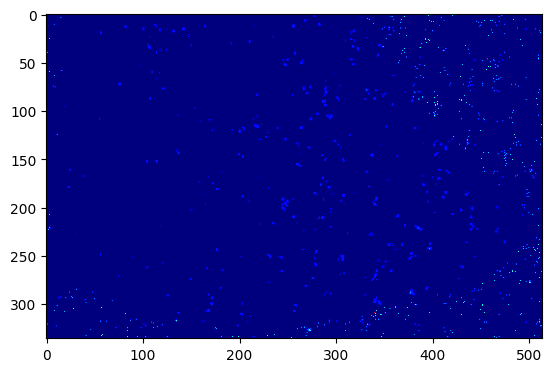

In [6]:
# cmaps en https://matplotlib.org/stable/users/explain/colors/colormaps.html


plt.imshow(canal_verde, cmap = 'jet')
plt.show()
plt.imshow(canal_verde_sobre_rojo, cmap = 'jet')
plt.show()
plt.imshow(canal_verde_anti_rojo, cmap = 'jet')
plt.show()



Cuantificación


Ahora vamos a querer cuantificar la señal en el canal verde en ambos arrays. Podemos hacerlos cuantificando el area positiva (cuantos pixels hay que son >0) o cuantificando la intensidad total por area (sumamos todos los pixels y lo dividimos por la cantidad de pixels >0)
Para hacerlo un poco más prolijo, primero vamos a hacer un par de funciones

In [33]:
def area_1_segun_2(canal1, canal2):
    '''Esta función recibe 2 arrays: canal1, canal2. Devuelve una tupla con dos valores, 
    el área (número de píxeles) del canal1 donde el canal2 es mayor a 0 y el área donde el canal2 es igual a 0.'''
    
    #Primero vamos a necesitar los lugares donde hay marca del canal 1
    # Máscara donde canal1 > 0
    mascara_sobre_1 = canal1 > 0
    
    #Ahora buscamos los lugares donde el canal 2 es positivo y donde es 0
    # Máscara donde canal2 > 0
    mascara_sobre_2 = canal2 > 0
    # Máscara donde canal2 == 0
    mascara_anti_2 = canal2 == 0

    # Ahora calculamos el área positiva para el canal 1 donde el canal 2 es positivo y donde es 0
    area_1_sobre_2 = np.sum(mascara_sobre_1 [mascara_sobre_2])
    area_1_anti_2 = np.sum(mascara_sobre_1 [mascara_anti_2])
    
    return (area_1_sobre_2, area_1_anti_2)

def intensidad_canal1_segun_area_canal2(canal1, canal2):
    '''Esta funcion recibe 2 arrays: canal1, canal2. Devuelve una tupla con dos valores,
    la intensidad media del canal1 donde el canal2 es mayor a 0 y la intensidad media del canal1 donde el canal2 es igual a 0.'''
    
    canal1_sobre_2 = canal1.copy()
    canal1_anti_2 = canal1.copy()
    
    canal1_sobre_2[canal2 == 0] = 0
    canal1_anti_2[canal2 != 0] = 0
    
    area_canal2 = np.sum(canal2 > 0)
    area_anti2 = np.sum(canal2 == 0)
    
    intensidad_1_sobre_2 = np.mean(canal1_sobre_2) / area_canal2
    intensidad_1_anti_2 = np.mean(canal1_anti_2) / area_anti2
    return (intensidad_1_sobre_2, intensidad_1_anti_2)


In [35]:
canal_verde.max()

29

In [36]:
#Probemos con la imagen de ejemplo
#contar pixels > 0 en canal verde
area_verde_total = np.sum(canal_verde > 0)
area_verde_sobre_rojo, area_verde_anti_rojo =  area_1_segun_2(canal_verde, canal_rojo)

print('Area verde total:', area_verde_total)
print('Area verde sobre rojo:', area_verde_sobre_rojo)
print('Area verde anti rojo:', area_verde_anti_rojo)

#Notar que el area roja (+) es mucho menor que el area roja (-). Estaría bueno normalizar esto.
area_roja_total = np.sum(canal_rojo > 0)
area_anti_rojo = np.sum(canal_rojo == 0)

area_verde_sobre_rojo_normalizada = area_verde_sobre_rojo / area_roja_total
area_verde_anti_rojo_normalizada = area_verde_anti_rojo / area_anti_rojo

print('Area verde sobre rojo normalizada:', area_verde_sobre_rojo_normalizada)
print('Area verde anti rojo normalizada:', area_verde_anti_rojo_normalizada)

intensidad_verde_sobre_rojo, intensidad_verde_anti_rojo = intensidad_canal1_segun_area_canal2(canal_verde, canal_rojo)
print('Intensidad meida por px verde sobre rojo:', intensidad_verde_sobre_rojo)
print('Intensidad meida por px verde anti rojo:', intensidad_verde_anti_rojo)

Area verde total: 3296
Area verde sobre rojo: 1144
Area verde anti rojo: 2152
Area verde sobre rojo normalizada: 0.056940918819371855
Area verde anti rojo normalizada: 0.014101026780156343
Intensidad meida por px verde sobre rojo: 1.7133571801757628e-06
Intensidad meida por px verde anti rojo: 1.2167603074472337e-07
